In [0]:
import numpy as np
import pandas as pd

Pandas - это библиотека Python, предоставляющая широкие возможности для анализа данных. С ее помощью очень удобно загружать, обрабатывать и анализировать табличные данные с помощью SQL-подобных запросов. В связке с библиотеками Matplotlib и Seaborn появляется возможность удобного визуального анализа табличных данных.

Основными структурами данных в Pandas являются классы Series и DataFrame. Первый из них представляет собой одномерный индексированный массив данных некоторого фиксированного типа. Второй - это двухмерная структура данных, представляющая собой таблицу, каждый столбец которой содержит данные одного типа. Можно представлять её как словарь объектов типа Series. Структура DataFrame отлично подходит для представления реальных данных: строки соответствуют признаковым описаниям отдельных объектов, а столбцы соответствуют признакам.

In [33]:
salaries = pd.Series([400, 300, 200, 250], 
              index = ['Andrew', 'Bob', 
                       'Charles', 'Ann']) 
print(salaries)

salaries['Carl'] = np.nan
print(salaries)

salaries.fillna(salaries.min(), inplace=True)
print(salaries)

Andrew     400
Bob        300
Charles    200
Ann        250
dtype: int64
Andrew     400.0
Bob        300.0
Charles    200.0
Ann        250.0
Carl         NaN
dtype: float64
Andrew     400.0
Bob        300.0
Charles    200.0
Ann        250.0
Carl       200.0
dtype: float64




Объекты Series похожи на ndarray и могут быть переданы в качестве аргументов большинству функций из Numpy.


## **Считываем данные из файла**

In [0]:
data = pd.read_csv('wine.csv')

In [36]:
type(data)

pandas.core.frame.DataFrame

**Смотрим на первые 5 строк**

In [ ]:
data.head(5)

In [49]:
import random
data.sample()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
50,1,13.05,1.73,2.04,12.4,92,2.72,3.27,0.17,2.91,7.2,1.12,2.91,1150


In [50]:
data.shape

(178, 14)

In [51]:
data.columns

Index(['Wine', 'Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols',
       'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue',
       'OD', 'Proline'],
      dtype='object')

## **Краткая статистика – info и describe**

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Wine                    178 non-null int64
Alcohol                 178 non-null float64
Malic.acid              178 non-null float64
Ash                     178 non-null float64
Acl                     178 non-null float64
Mg                      178 non-null int64
Phenols                 178 non-null float64
Flavanoids              178 non-null float64
Nonflavanoid.phenols    178 non-null float64
Proanth                 178 non-null float64
Color.int               178 non-null float64
Hue                     178 non-null float64
OD                      178 non-null float64
Proline                 178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [53]:
data.describe()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


##**Индексация**

In [54]:
data['Ash'].head()

0    2.43
1    2.14
2    2.67
3    2.50
4    2.87
Name: Ash, dtype: float64

**loc и iloc**

In [18]:
data.loc[0:5, ['Color.int', 'Hue']]

,Color.int,Hue
0,5.64,1.04
1,4.38,1.05
2,5.68,1.03
3,7.80,0.86
4,4.32,1.04
5,6.75,1.05


In [21]:
data.iloc[:,-4:-2].head()

,Color.int,Hue
0,5.64,1.04
1,4.38,1.05
2,5.68,1.03
3,7.80,0.86
4,4.32,1.04


##**Добавление столбцов (построение признаков)**

In [0]:
data['is_strong'] = (data['Alcohol'] > 
                   data['Alcohol'].quantile(.75)).astype('int64')

In [0]:
data['Alcohol']=data['Alcohol'].astype('int64')

In [58]:
data.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline,is_strong,rubbish
0,1,14,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,42.0008
1,1,13,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0,33.1984
2,1,13,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0,33.8152
3,1,14,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,37.5600
4,1,13,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0,39.3672


In [0]:
data['rubbish'] = .56 * data['Ash'] + 0.32 * data['Mg']

##**Логическая индексация**

In [59]:
data[data['Wine'] == 1]['Color.int'].mean(), \
data[data['Wine'] == 2]['Color.int'].mean(), \
data[data['Wine'] == 3]['Color.int'].mean()


(5.528305084745763, 3.08661971830986, 7.396249979166668)

In [24]:
data[(data['Wine'] == 1) & (data['Ash'] > 2.5)]['Hue'].mean(), \
data[(data['Wine'] == 1) & (data['Ash'] < 2.5)]['Hue'].mean()

(1.0899999999999999, 1.0541176470588234)

In [60]:
data['Wine'].value_counts()

2    71
1    59
3    48
Name: Wine, dtype: int64

In [61]:
data['Alcohol'].value_counts()

13    70
12    67
14    22
11    19
Name: Alcohol, dtype: int64

## **Groupby**

In [13]:
for look, sub_df in data.groupby('Alcohol'):
    print(look)
    
    # что угодно
    print(sub_df['Phenols'].mean())

11
2.397894736842105
12
2.01134328358209
13
2.364428571428572
14
2.8499999999999996


In [14]:
data.groupby('Alcohol')[['Flavanoids', 'Hue']].agg(np.median)

,Flavanoids,Hue
Alcohol,,
11,2.140,0.960
12,1.640,0.930
13,2.645,0.960
14,3.020,1.045


### **Сводная таблица**

In [15]:
pd.crosstab(data['Wine'], data['Alcohol'])

Alcohol,11,12,13,14
Wine,,,,
1,0,2,38,19
2,19,44,8,0
3,0,21,24,3


##**map и apply**

In [0]:
def strong(is_strong):
    return 'is strong' if is_strong else 'is not strong'

In [0]:
d =  {1: 'is strong', 0: 'is not strong'}

In [62]:
data['is_strong'].map(d).head()

0        union
1    non-union
2    non-union
3        union
4    non-union
Name: is_strong, dtype: object

In [28]:
data['is_strong'].apply(lambda x: 'is strong' if x else 'is not strong').head()

0        is strong
1    is not strong
2    is not strong
3        is strong
4    is not strong
Name: is_strong, dtype: object

In [31]:
data[(data['Wine'] == 2) & 
     (data['Ash'] > 2.5)].sort_values(by='Mg',
                               ascending=False).head()



,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline,is_strong,rubbish
73,2,12,1.67,2.60,30.0,139,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985,0,45.9360
96,2,11,2.12,2.74,21.5,134,1.60,0.99,0.14,1.56,2.50,0.95,2.26,625,0,44.4144
121,2,11,2.05,3.23,28.5,119,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465,0,39.8888
64,2,12,1.45,2.53,19.0,104,1.89,1.75,0.45,1.03,2.95,1.45,2.23,355,0,34.6968
112,2,11,2.68,2.92,20.0,103,1.75,2.03,0.60,1.05,3.80,1.23,2.50,607,0,34.5952


In [0]:
import matplotlib.pyplot as plt

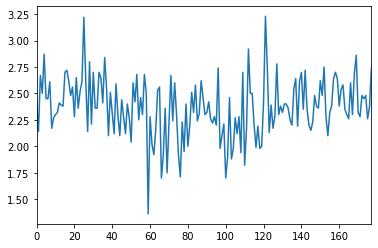

In [67]:
data['Ash'].bar()